# Astro 9

# Lecture 12: Calculus in Python Part 1

## Derivatives

Let's take a look at the different ways we can calculate a derivative in python and how affective each of those methods are.

 Forward difference took 0.0002491474151611 seconds
 Backward difference took 0.0002245903015137 seconds
 Centered difference took 0.0002171993255615 seconds
 Scipy took 0.0023798942565918 seconds


/tmp/ipykernel_63/95853925.py:59: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dys[i] =  derivative(func1, x[i], dx=0.01)


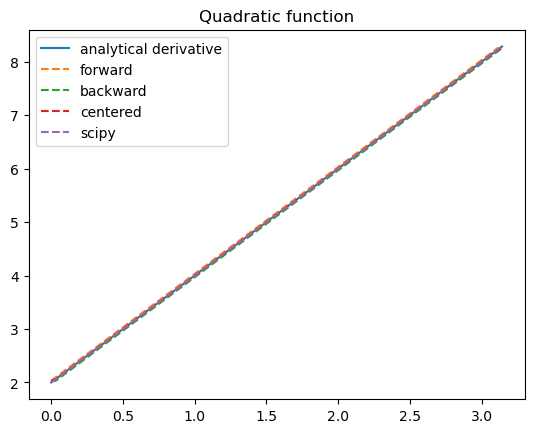

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.misc import derivative
from pylab import *
import time

'''
These are the brainless way to calculate numerical derivatives. They
work well for very smooth data. they are surprisingly fast even up to
10000 points in the vector.
'''

x = np.linspace(0,np.pi,100)
y = x**2+2*x-5
dy_analytical = 2*x+2
'''
lets use a forward difference method:
that works up until the last point, where there is not
a forward difference to use. there, we use a backward difference.
'''

tf1 = time.time()
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Forward difference took %1.16f seconds' % (time.time() - tf1))

'''and now a backwards difference'''
tb1 = time.time()
dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

print (' Backward difference took %1.16f seconds' % (time.time() - tb1))

'''and now, a centered formula'''
tc1 = time.time()
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Centered difference took %1.16f seconds' % (time.time() - tc1))

'''and finally, with scipy'''
def func1(x):
    y = x**2+2*x-5
    return y

ts1 = time.time()
dys = [0.0]*len(x)
for i in range(len(y)):
    dys[i] =  derivative(func1, x[i], dx=0.01)
print (' Scipy took %1.16f seconds' % (time.time() - ts1))

#plot(x,y)
plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x,dyf,'--',label='forward')
plt.plot(x,dyb,'--',label='backward')
plt.plot(x,dyc,'--',label='centered')
plt.plot(x, dys, '--', label ='scipy')
plt.title('Quadratic function')

plt.legend(loc='upper left')
#plt.savefig('9.2.1-simple-diffs.png')
plt.show()

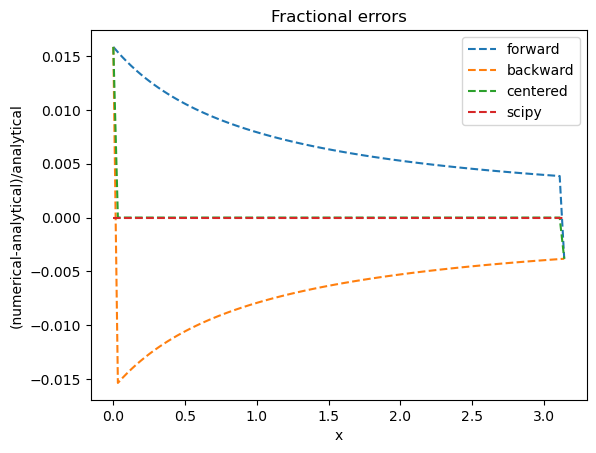

In [5]:
diff_dyf = (dyf-dy_analytical)/dy_analytical
diff_dyb = (dyb-dy_analytical)/dy_analytical
diff_dyc = (dyc-dy_analytical)/dy_analytical
diff_dys = (dys-dy_analytical)/dy_analytical

plt.plot(x,diff_dyf,'--',label='forward')
plt.plot(x,diff_dyb,'--',label='backward')
plt.plot(x,diff_dyc,'--',label='centered')
plt.plot(x,diff_dys,'--',label='scipy')
plt.title('Fractional errors')
plt.xlabel('x')
plt.ylabel('(numerical-analytical)/analytical')

legend(loc='upper right')
plt.show()

 Forward difference took 0.0002341270446777 seconds
 Backward difference took 0.0002279281616211 seconds
 Centered difference took 0.0002100467681885 seconds
 Scipy took 0.0041470527648926 seconds


/tmp/ipykernel_63/1732880451.py:54: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dys[i] =  derivative(func2, x[i], dx=1e-6)


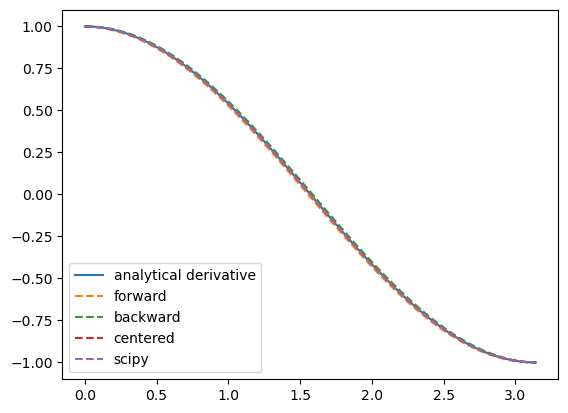

In [6]:
'''
These are the brainless way to calculate numerical derivatives. They
work well for very smooth data. they are surprisingly fast even up to
10000 points in the vector.
'''

x = np.linspace(0,np.pi,100)
y = np.sin(x)
dy_analytical = np.cos(x)
'''
lets use a forward difference method:
that works up until the last point, where there is not
a forward difference to use. there, we use a backward difference.
'''

tf1 = time.time()
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Forward difference took %1.16f seconds' % (time.time() - tf1))

'''and now a backwards difference'''
tb1 = time.time()
dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

print (' Backward difference took %1.16f seconds' % (time.time() - tb1))

'''and now, a centered formula'''
tc1 = time.time()
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Centered difference took %1.16f seconds' % (time.time() - tc1))


'''and finally, with scipy'''
def func2(x):
    y = np.sin(x)
    return y

ts1 = time.time()
dys = [0.0]*len(x)
for i in range(len(y)):
    dys[i] =  derivative(func2, x[i], dx=1e-6)
print (' Scipy took %1.16f seconds' % (time.time() - ts1))

%matplotlib inline

#plot(x,y)
plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x,dyf,'--',label='forward')
plt.plot(x,dyb,'--',label='backward')
plt.plot(x,dyc,'--',label='centered')
plt.plot(x, dys, '--', label ='scipy')
plt.legend(loc='lower left')
#savefig('9.2.1-simple-diffs.png')
plt.show()

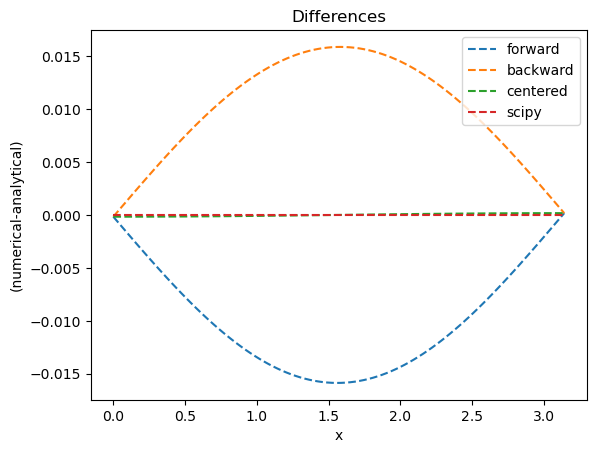

In [7]:
diff_dyf = dyf-dy_analytical
diff_dyb = dyb-dy_analytical
diff_dyc = dyc-dy_analytical
diff_dys = dys-dy_analytical

plt.plot(x,diff_dyf,'--',label='forward')
plt.plot(x,diff_dyb,'--',label='backward')
plt.plot(x,diff_dyc,'--',label='centered')
plt.plot(x,diff_dys,'--',label='scipy')
plt.title('Differences')
plt.xlabel('x')
plt.ylabel('(numerical-analytical)')

legend(loc='upper right')
plt.show()

 Forward difference took 0.0012829303741455 seconds
 Backward difference took 0.0008869171142578 seconds
 Centered difference took 0.0010385513305664 seconds
 Scipy took 0.0248553752899170 seconds


/tmp/ipykernel_63/3875023951.py:53: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dys[i] =  derivative(func3, x[i], dx=1e-6)


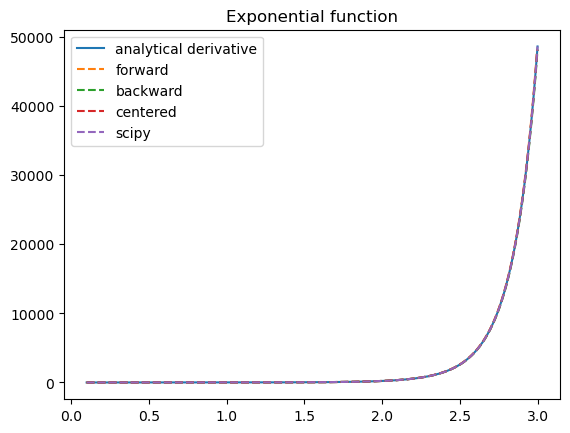

In [8]:
'''
These are the brainless way to calculate numerical derivatives. They
work well for very smooth data. they are surprisingly fast even up to
10000 points in the vector.
'''

x = np.linspace(0.1,3,1000)
y = np.exp(x**2) #e^(x^2)
dy_analytical = 2*x*np.exp(x**2)
'''
lets use a forward difference method:
that works up until the last point, where there is not
a forward difference to use. there, we use a backward difference.
'''

tf1 = time.time()
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Forward difference took %1.16f seconds' % (time.time() - tf1))

'''and now a backwards difference'''
tb1 = time.time()
dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

print (' Backward difference took %1.16f seconds' % (time.time() - tb1))

'''and now, a centered formula'''
tc1 = time.time()
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print (' Centered difference took %1.16f seconds' % (time.time() - tc1))

'''and finally, with scipy'''
def func3(x):
    y = np.exp(x**2)
    return y

ts1 = time.time()
dys = [0.0]*len(x)
for i in range(len(y)):
    dys[i] =  derivative(func3, x[i], dx=1e-6)
print (' Scipy took %1.16f seconds' % (time.time() - ts1))

#plot(x,y)
plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x,dyf,'--',label='forward')
plt.plot(x,dyb,'--',label='backward')
plt.plot(x,dyc,'--',label='centered')
plt.plot(x, dys, '--', label ='scipy')
plt.title('Exponential function')

legend(loc='upper left')

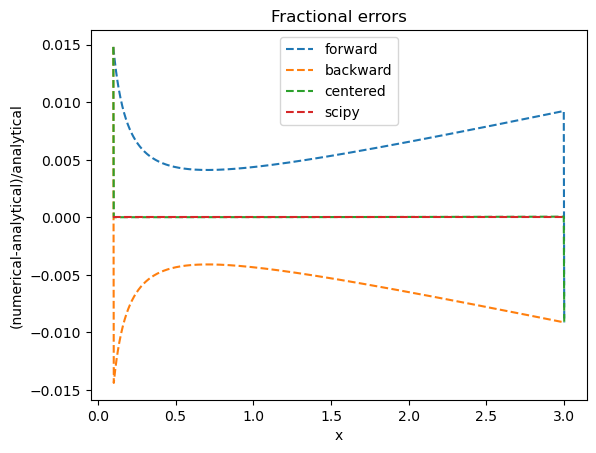

In [10]:
r_dyf = dyf/dy_analytical-1
r_dyb = dyb/dy_analytical-1
r_dyc = dyc/dy_analytical-1
r_dys = dys/dy_analytical-1

plt.plot(x,r_dyf,'--',label='forward')
plt.plot(x,r_dyb,'--',label='backward')
plt.plot(x,r_dyc,'--',label='centered')
plt.plot(x,r_dys,'--',label='scipy')
plt.title('Fractional errors')
plt.xlabel('x')
plt.ylabel('(numerical-analytical)/analytical')

legend(loc='upper center')
plt.show()

### Derivatives in the presense of noise

/tmp/ipykernel_63/2469369511.py:12: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dys[i] =  derivative(func4, x[i])


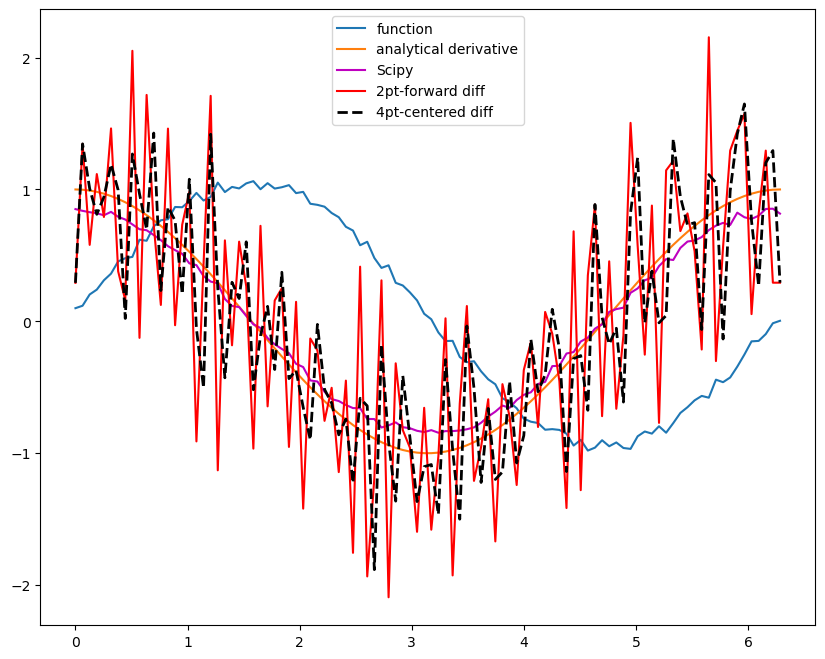

In [11]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + 0.1*np.random.random(size=x.shape)
dy_analytical = np.cos(x)

def func4(x):
    y = np.sin(x) + 0.1*np.random.random(size=x.shape)
    return y


dys = [0.0]*len(x)
for i in range(len(y)):
    dys[i] =  derivative(func4, x[i])


#2-point formula
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

'''
calculate dy by 4-point center differencing using array slices

\frac{y[i-2] - 8y[i-1] + 8[i+1] - y[i+2]}{12h}

y[0] and y[1] must be defined by lower order methods
and y[-1] and y[-2] must be defined by lower order methods
'''

dy = np.zeros(y.shape,float) #we know it will be this size
h = x[1]-x[0] #this assumes the points are evenely spaced!
dy[2:-2] = (y[0:-4] - 8*y[1:-3] + 8*y[3:-1] - y[4:])/(12.*h)

dy[0] = (y[1]-y[0])/(x[1]-x[0])
dy[1] = (y[2]-y[1])/(x[2]-x[1])
dy[-2] = (y[-2] - y[-3])/(x[-2] - x[-3])
dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

fg3 = plt.figure(figsize=(10,8))
plt.plot(x,y,label='function')
plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x,dys,'m-',label='Scipy')
plt.plot(x,dyf,'r-',label='2pt-forward diff')
plt.plot(x,dy,'k--',lw=2,label='4pt-centered diff')

plt.legend(loc='upper center')